In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt

### Question

Monte Carlo를 이용해 다음을 푸시오.  
a) 가로와 세로가 1인 정사각형 안에 존재하는 반지름 1인 원의 넓이를 구하고, 이를 시각화하시오.  
b) 지름 1인 원 안에서 임의의 두 점을 골랐을 때, 두 점 사이의 거리의 분포를 구하고, 이를 시각화하시오.

Empirically, The ratio of points inside circle: 0.7760
Theorically, The ratio of points inside circle: 0.7854


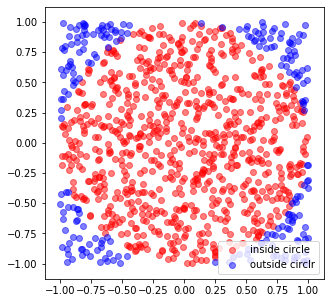

In [2]:
# a) 
n = 1000

xs = np.random.uniform(-1, 1, n)
ys = np.random.uniform(-1, 1, n)

dists = np.sqrt(xs**2 + ys**2)

inside_circle = dists<=1
outside_circle = dists>1

print(f"Empirically, The ratio of points inside circle: {np.mean(inside_circle):.4f}")
print(f"Theorically, The ratio of points inside circle: {np.pi/4:.4f}")

plt.figure(figsize=(5,5))
plt.scatter(xs[inside_circle], ys[inside_circle], color='red', alpha=0.5)
plt.scatter(xs[outside_circle], ys[outside_circle], color='blue', alpha=0.5)
plt.legend(['inside circle', 'outside circlr'])
plt.show()

In [3]:
%%time
# 최적화 필요
# b)
dist = []
for pair in itertools.combinations(zip(xs[inside_circle], ys[inside_circle]), 2):
    dist.append(np.sum(np.subtract(pair[0], pair[1])**2))

CPU times: user 2.49 s, sys: 9.07 ms, total: 2.49 s
Wall time: 2.5 s


(array([87315., 63213., 47377., 35200., 25144., 18014., 12037.,  7366.,
         3860.,  1174.]),
 array([6.58307386e-06, 3.95744689e-01, 7.91482795e-01, 1.18722090e+00,
        1.58295901e+00, 1.97869711e+00, 2.37443522e+00, 2.77017333e+00,
        3.16591143e+00, 3.56164954e+00, 3.95738764e+00]),
 <a list of 10 Patch objects>)

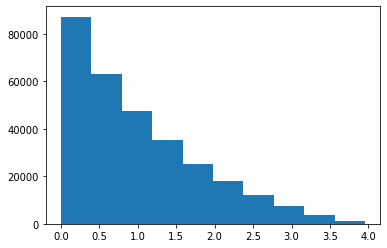

In [4]:
plt.hist(dist)
plt.show()